<a href="https://colab.research.google.com/github/Saraf-Tasnim/EDGE-Project/blob/main/Saraf_EDGE_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PP-04\
EDGE Project

In [ ]:
record = {'Name' : ['Licoln', 'Hermione', 'Hester', 'Joe', 'Baz'],
          'ID' : ['NC01', 'NC02', 'NC03', 'NC04', 'NC05'],
          'SWE' : [48, 67, 74, 55, 81],
          'EEE' : [67, 74, 81, 44, 79],
          'Attendance percentage' : [70, 88, 99, 82, 90,],
          'Assignment completion' : ['yes', 'yes', 'yes', 'no', 'yes']}

In [ ]:
#create a CSV file

import csv
with open('record.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(record.keys())
    writer.writerows(zip(*record.values()))

!cat record.csv

Name,ID,SWE,EEE,Attendance percentage,Assignment completion
Licoln,NC01,48,67,70,yes
Hermione,NC02,67,74,88,yes
Hester,NC03,74,81,99,yes
Joe,NC04,55,44,82,no
Baz,NC05,81,79,90,yes


In [ ]:
#read CSV file

import pandas as pd
df = pd.read_csv('record.csv')
df

,Name,ID,SWE,EEE,Attendance percentage,Assignment completion
0,Licoln,NC01,48,67,70,yes
1,Hermione,NC02,67,74,88,yes
2,Hester,NC03,74,81,99,yes
3,Joe,NC04,55,44,82,no
4,Baz,NC05,81,79,90,yes


In [ ]:
#finding average score

import pandas as pd

df = pd.read_csv('record.csv')
average_score = df['SWE'].mean()

print(f'Average score in SWE:')
print(average_score)

#Finding maximum and minimum score

highest_score = max(record['SWE'])

lowest_score = min(record['SWE'])

print(f'Highest score in SWE:')
print(highest_score)

print(f'Lowest score in SWE:')
print(lowest_score)

Average score in SWE:
65.0
Highest score in SWE:
81
Lowest score in SWE:
48


In [ ]:
#Failing a specific subject EEE

import pandas as pd

df = pd.read_csv('record.csv')

failing_eee = df[df['EEE'] < 50]

print("Students failing EEE:")
print(failing_eee['Name'])

Students failing EEE:
3    Joe
Name: Name, dtype: object


In [ ]:
#finding students with attendance < 75% or no assignment

import pandas as pd

df = pd.read_csv('record.csv')


low_attendance_or_no_assignment = df[(df['Attendance percentage'] < 75) | (df['Assignment completion'] == 'no')]

print("Students with attendance < 75% or no assignment:")
print(low_attendance_or_no_assignment['Name'])

Students with attendance < 75% or no assignment:
0    Licoln
3       Joe
Name: Name, dtype: object


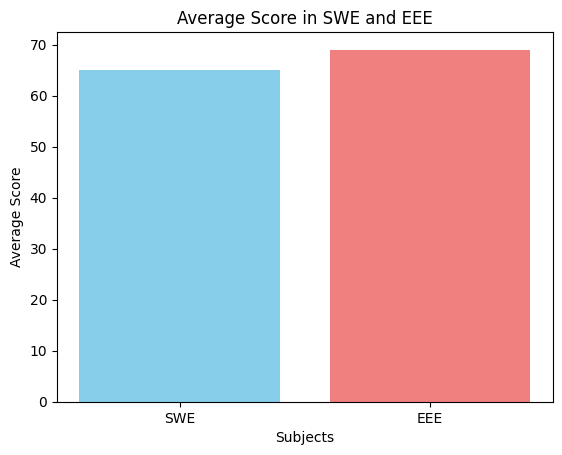

In [ ]:
#creating a bar chart of average score in SWE an EEE in 'record'

import matplotlib.pyplot as plt


average_swe = df['SWE'].mean()
average_eee = df['EEE'].mean()


subjects = ['SWE', 'EEE']
average_scores = [average_swe, average_eee]

plt.bar(subjects, average_scores, color=['skyblue', 'lightcoral'])
plt.xlabel("Subjects")
plt.ylabel("Average Score")
plt.title("Average Score in SWE and EEE")
plt.show()

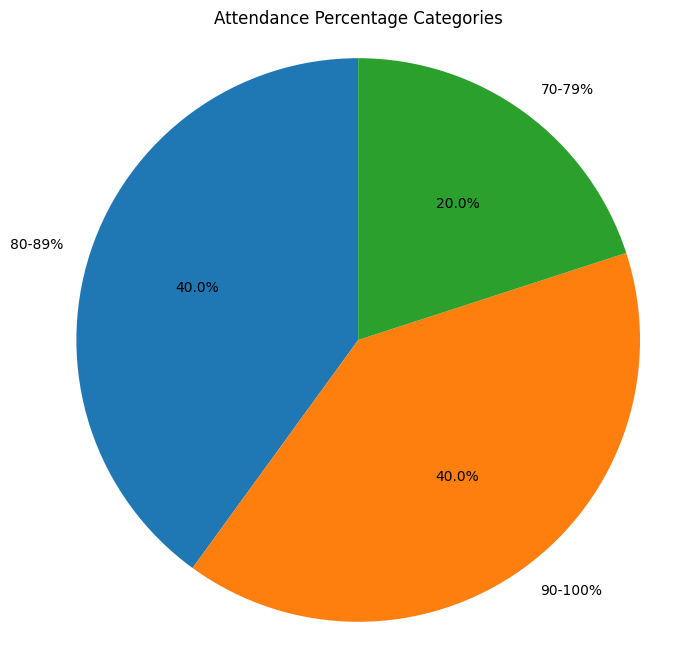

In [ ]:
#pie chart of attendance percentage categories

import pandas as pd
import matplotlib.pyplot as plt


def categorize_attendance(percentage):
    if percentage >= 90:
        return '90-100%'
    elif percentage >= 80:
        return '80-89%'
    elif percentage >= 70:
        return '70-79%'
    else:
        return 'Below 70%'

df['Attendance Category'] = df['Attendance percentage'].apply(categorize_attendance)


attendance_counts = df['Attendance Category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Attendance Percentage Categories')
plt.axis('equal')
plt.show()

In [ ]:
#calculating aggregate score for each student

import pandas as pd

df['Aggregate score'] = df['SWE'] + df['EEE']

df

,Name,ID,SWE,EEE,Attendance percentage,Assignment completion,Attendance Category,Aggregate Score,Total Score,Aggregate score,Total score
0,Licoln,NC01,48,67,70,yes,70-79%,57.5,115,115,115
1,Hermione,NC02,67,74,88,yes,80-89%,70.5,141,141,141
2,Hester,NC03,74,81,99,yes,90-100%,77.5,155,155,155
3,Joe,NC04,55,44,82,no,80-89%,49.5,99,99,99
4,Baz,NC05,81,79,90,yes,90-100%,80.0,160,160,160


In [ ]:
#Grading score in EEE

import pandas as pd

def determine_grade(score):
    if 80 < score <= 100:
        return 'A+'
    elif 75 < score <= 80:
        return 'A'
    elif 70 < score <= 75:
        return 'A-'
    elif 65 < score <= 70:
        return 'B+'
    elif 60 < score <= 65:
        return 'B'
    elif 55 < score <= 60:
        return 'B-'
    elif 50 < score <= 55:
        return 'C'
    elif 0 <= score <= 50:
        return 'F'
    else:
        return 'Invalid Score'

df['Grade in EEE'] = df['EEE'].apply(determine_grade)

df

,Name,ID,SWE,EEE,Attendance percentage,Assignment completion,Attendance Category,Aggregate Score,Total Score,Aggregate score,Total score,Grade in EEE
0,Licoln,NC01,48,67,70,yes,70-79%,57.5,115,115,115,B+
1,Hermione,NC02,67,74,88,yes,80-89%,70.5,141,141,141,A-
2,Hester,NC03,74,81,99,yes,90-100%,77.5,155,155,155,A+
3,Joe,NC04,55,44,82,no,80-89%,49.5,99,99,99,F
4,Baz,NC05,81,79,90,yes,90-100%,80.0,160,160,160,A


In [49]:
#validating student ID using regex, conditions: ID will have 4 characters, the first two will be 'NC' and the last two characters will be integers

import re

def validate_student_id(student_id):
  """
  Validates a student ID using a regular expression.

  Args:
    student_id: The student ID to validate.

  Returns:
    True if the student ID is valid, False otherwise.
  """
  pattern = r'^NC[0-9]{2}$'  # Matches "NC" followed by two digits
  match = re.match(pattern, student_id)
  return bool(match)


for student_id in record['ID']:
  if validate_student_id(student_id):
    print(f"{student_id} is a valid student ID.")
  else:
    print(f"{student_id} is not a valid student ID.")

NC01 is a valid student ID.
NC02 is a valid student ID.
NC03 is a valid student ID.
NC04 is a valid student ID.
NC05 is a valid student ID.
